In [35]:
import os
os.environ['NETWORKX_AUTOMATIC_BACKENDS'] = 'cugraph'


build graph

In [71]:
import networkx as nx

max_user_id = 1157827

G = nx.Graph()

# Add all possible user ids as nodes
for node_id in range(1, max_user_id + 1):
    G.add_node(node_id)

with open('socialmedia.graph.txt', 'r') as file:
    for line in file:
        if line.startswith('#'):
            continue
        from_node, to_node = map(int, line.split())
        # add edge
        G.add_edge(from_node, to_node)





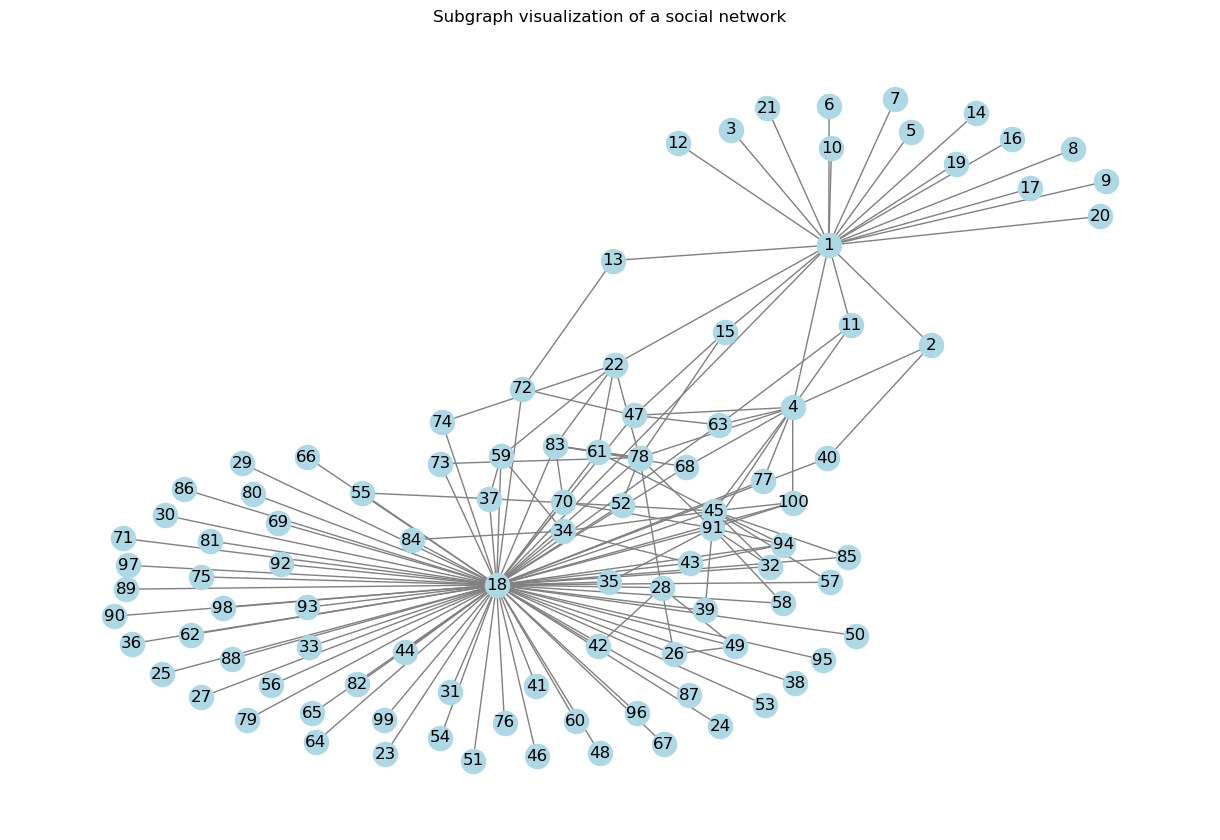

In [37]:
import matplotlib.pyplot as plt
sub_nodes = list(G.nodes())[:100]  
sub_G = G.subgraph(sub_nodes)
plt.figure(figsize=(12, 8))
nx.draw(sub_G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Subgraph visualization of a social network')
plt.show()

calculate and plot the clustering coefficient and degree distribution of the network

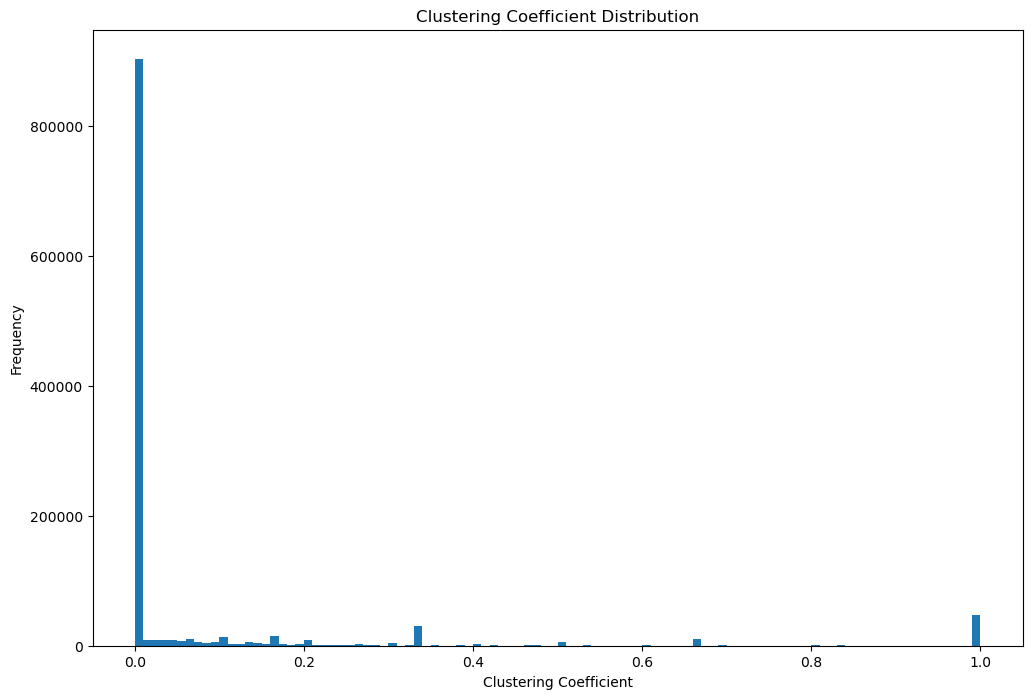

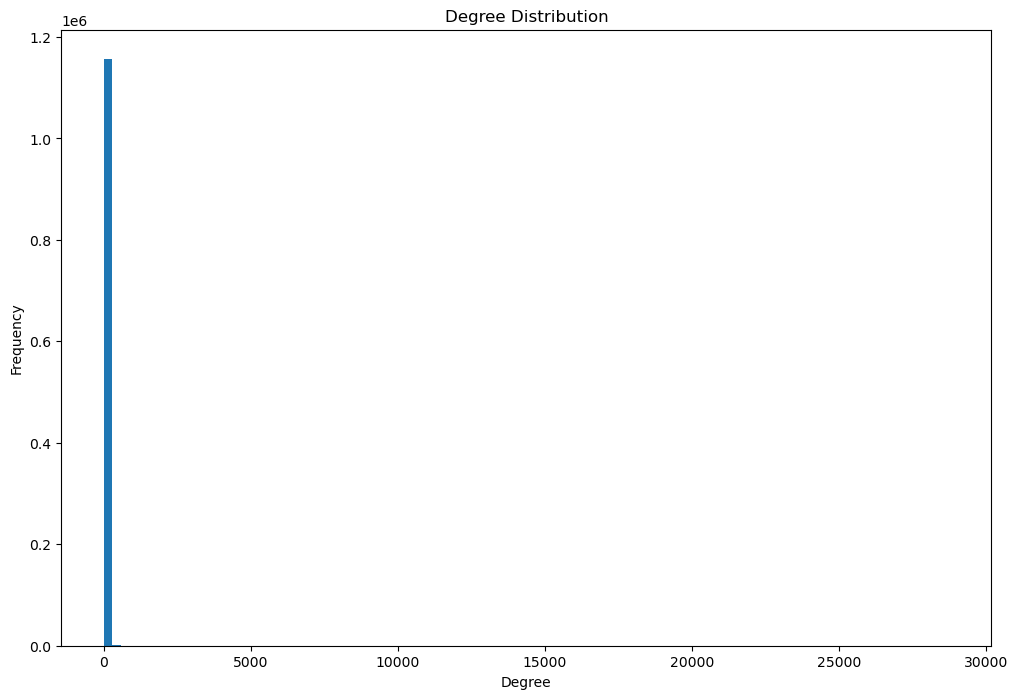

In [4]:
import networkx as nx
import matplotlib.pyplot as plt


clustering_coefficients = nx.clustering(G)

plt.figure(figsize=(12, 8))
plt.hist(clustering_coefficients.values(), bins=100)
plt.title("Clustering Coefficient Distribution")
plt.ylabel("Frequency")
plt.xlabel("Clustering Coefficient")
plt.show()

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  
plt.figure(figsize=(12, 8))
plt.hist(degree_sequence, bins=100)
plt.title("Degree Distribution")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()


 Identify the most influential nodes in a network 

In [72]:
import networkx as nx
import matplotlib.pyplot as plt


degree_centrality = nx.degree_centrality(G, backend="cugraph")

print(2)
eigenvector_centrality = nx.eigenvector_centrality(G, backend="cugraph")





2


In [73]:
# Find the 10 most influential nodes under each centrality indicator
top_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:1000]
top_eigenvector = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:1000]

top10_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:1000]
top10_eigenvector = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:1000]






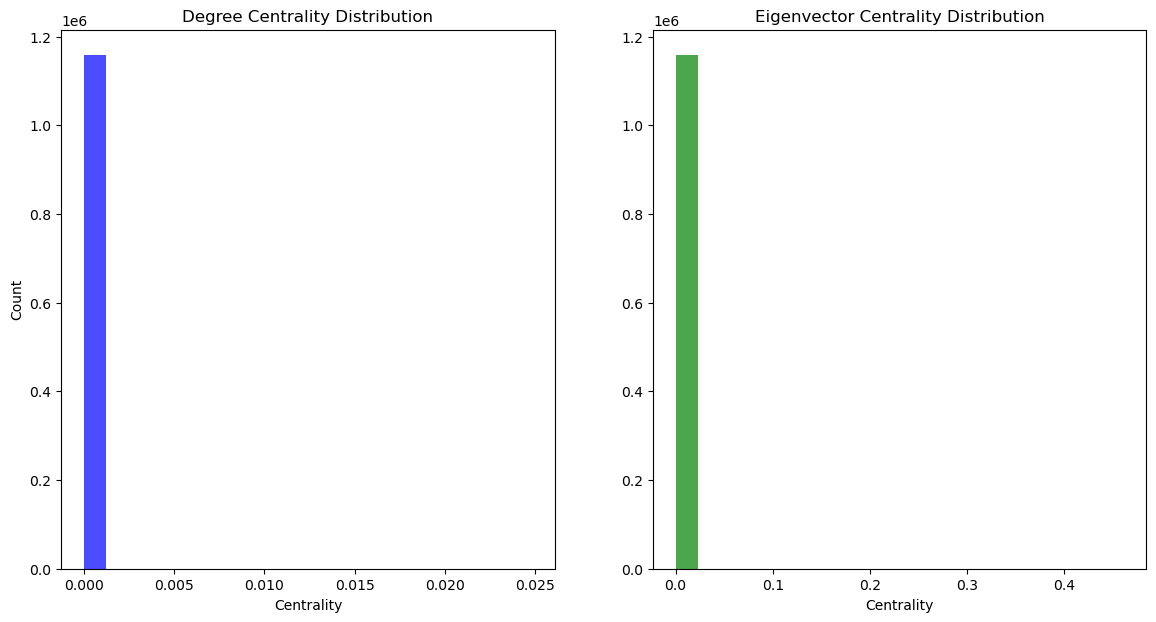

In [74]:
# Centrality distribution map
plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.title("Degree Centrality Distribution")
plt.hist(degree_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Centrality')
plt.ylabel('Count')

plt.subplot(122)
plt.title("Eigenvector Centrality Distribution")
plt.hist(eigenvector_centrality.values(), bins=20, color='green', alpha=0.7)
plt.xlabel('Centrality')
plt.show()


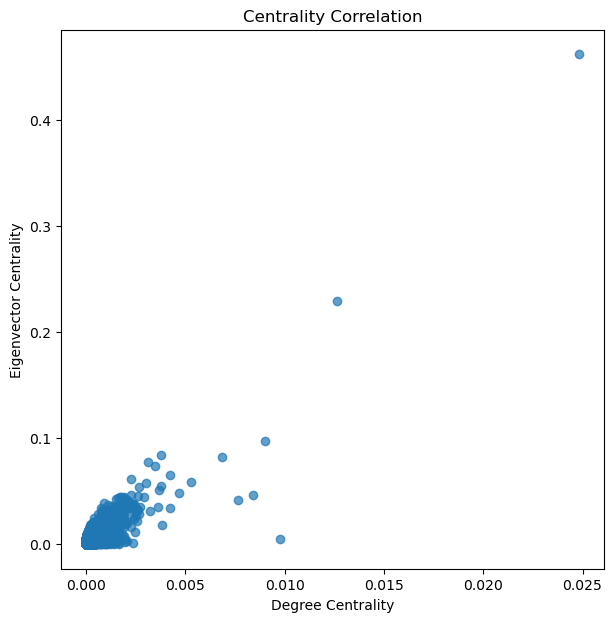

In [75]:
# Centrality distribution map
plt.figure(figsize=(7, 7))
plt.title("Centrality Correlation")
plt.scatter(degree_centrality.values(), eigenvector_centrality.values(), alpha=0.7)
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality')
plt.show()

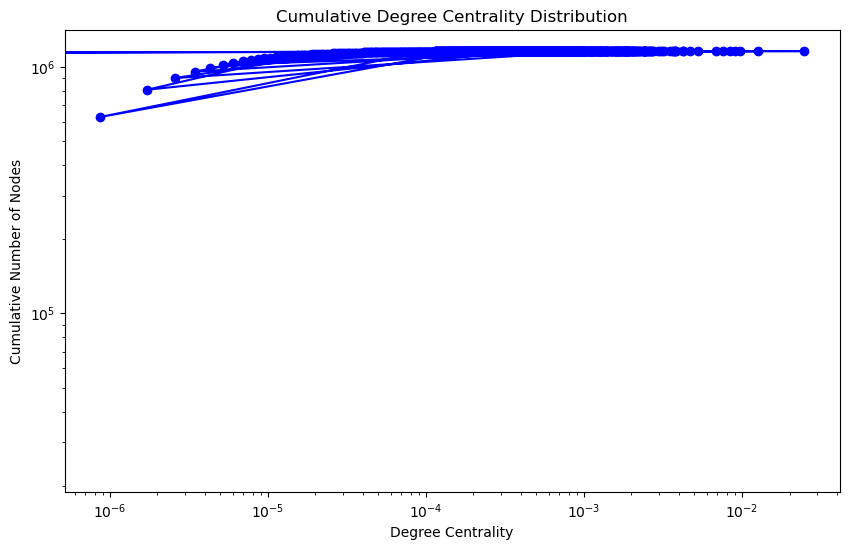

In [76]:
import matplotlib.pyplot as plt
from collections import Counter

degree_centrality_values = list(degree_centrality.values())
degree_centrality_counts = Counter(degree_centrality_values)
cumulative_counts = {k: sum(v for d, v in degree_centrality_counts.items() if d <= k) for k in degree_centrality_counts}

plt.figure(figsize=(10, 6))
plt.plot(list(cumulative_counts.keys()), list(cumulative_counts.values()), 'bo-')
plt.title('Cumulative Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Cumulative Number of Nodes')
plt.xscale('log')  
plt.yscale('log')
plt.show()



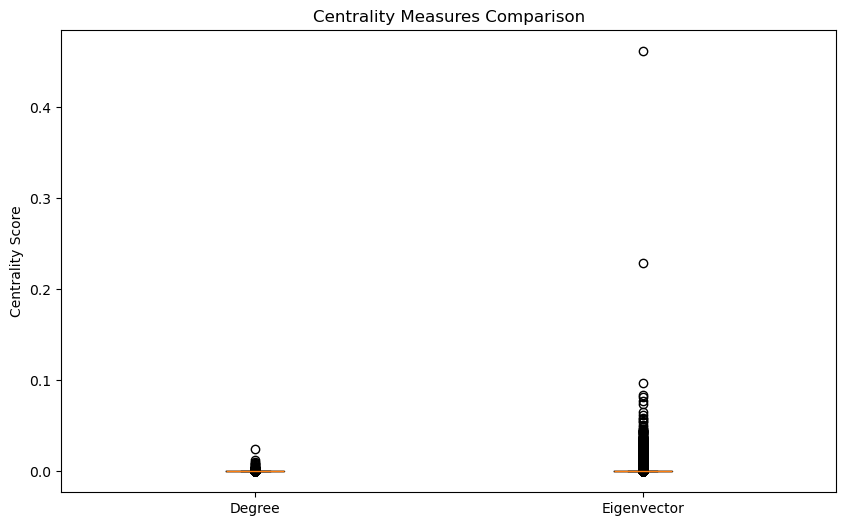

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot([list(degree_centrality.values()), list(eigenvector_centrality.values())], labels=['Degree', 'Eigenvector'])
plt.title('Centrality Measures Comparison')
plt.ylabel('Centrality Score')
plt.show()


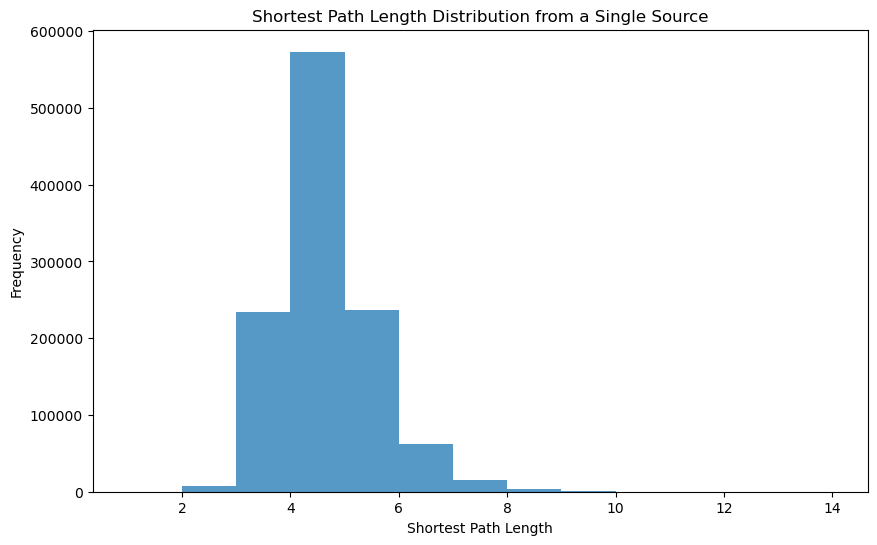

In [11]:
# Select one node and calculate the shortest path length to all the other nodes
path_lengths = nx.single_source_shortest_path_length(G, source=list(G.nodes())[0])
plt.figure(figsize=(10, 6))
plt.hist(list(path_lengths.values()), alpha=0.75, bins=range(1, max(path_lengths.values()) + 2))
plt.title('Shortest Path Length Distribution from a Single Source')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# The neighbor network of the most influential node
top_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]

focus_node = top_degree[0]
focus_neighbors = list(G.neighbors(focus_node))
focus_subgraph = G.subgraph([focus_node] + focus_neighbors)

pos = nx.spring_layout(focus_subgraph)
# nx.draw_networkx(focus_subgraph, pos, with_labels=True, node_color='red', edge_color='black')
# plt.title(f"Neighborhood of Node {focus_node} with Highest Degree Centrality")
# plt.show()

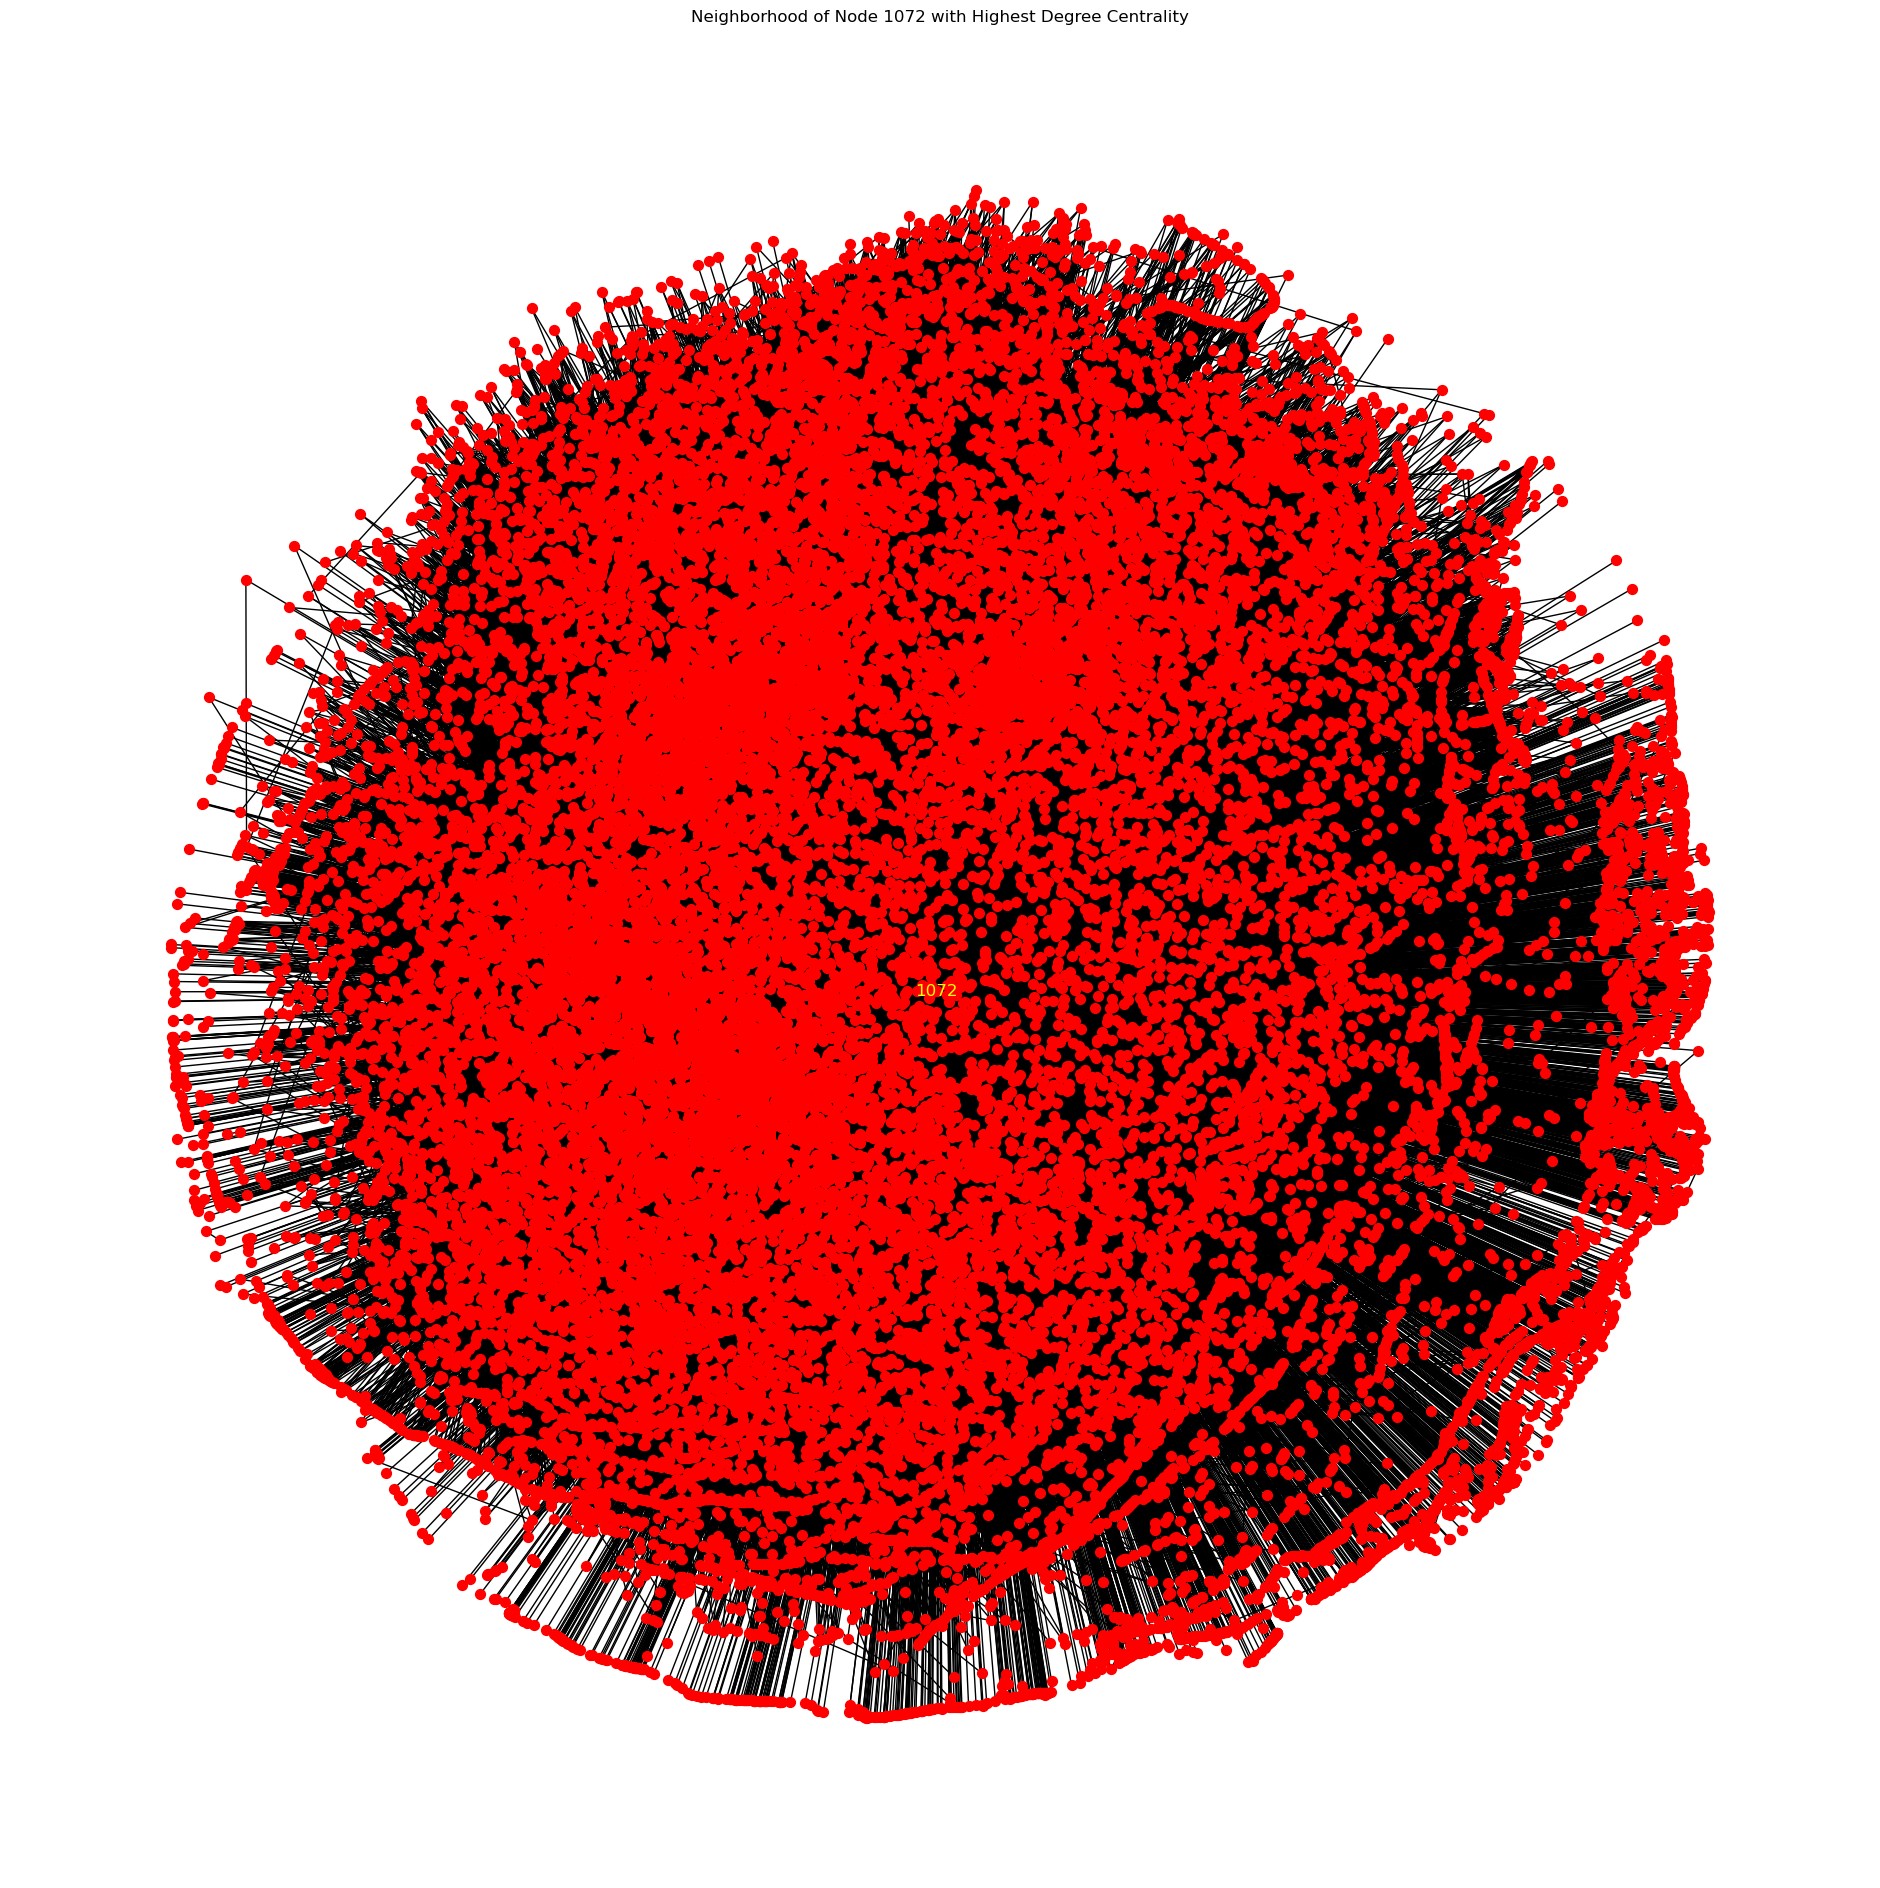

In [80]:

plt.figure(figsize=(24, 24))
           
nx.draw_networkx_nodes(focus_subgraph, pos, node_color='red', node_size=50)
nx.draw_networkx_edges(focus_subgraph, pos, edge_color='black', width=1)

nx.draw_networkx_labels(focus_subgraph, pos, labels={focus_node: str(focus_node)}, font_color='yellow')

plt.title(f"Neighborhood of Node {focus_node} with Highest Degree Centrality")
plt.axis('off')  
plt.show()

Identify isolated nodes

In [13]:
# c. 
isolated_nodes = list(nx.isolates(G))
print("isolated_nodes:", len(isolated_nodes))
print("isolated_nodes:", isolated_nodes[:10])  


isolated_nodes: 22937
isolated_nodes: [635474, 635475, 635476, 635477, 635478, 635479, 635480, 635481, 635482, 635483]


Identification connected component

In [14]:
# d. Identification connected component
connected_components = list(nx.connected_components(G, backend="cugraph"))
print("connected_components:", len(connected_components))
print("max(connected_components:", len(max(connected_components, key=len)))


connected_components: 22938
max(connected_components: 1134890


 Average Shortest Path Length of the Network

In [15]:
import networkx as nx
import cugraph
import cudf
import random


edges_df = nx.to_pandas_edgelist(G)
edges_cudf = cudf.DataFrame(edges_df)


cuG = cugraph.Graph()
cuG.from_cudf_edgelist(edges_cudf, source='source', destination='target')

num_random_sources = 1000

edges_df_pandas = edges_cudf.to_pandas()

all_distances = []


for _ in range(num_random_sources):
    source_vertex = random.choice(edges_df_pandas['source'].tolist())
    shortest_paths = cugraph.bfs(cuG, source_vertex)
    all_distances.extend(shortest_paths['distance'].to_pandas().tolist())

# avg_shortest_path_length
avg_shortest_path_length = sum(all_distances) / len(all_distances)
print("avg_shortest_path_length:", avg_shortest_path_length)



avg_shortest_path_length: 4.163009630889337


In [33]:
import cugraph
import cudf
import random



# A starting node is randomly selected from the maximum connected component
start_node = random.choice(list(largest_component))

# The first BFS is performed from the start node
first_bfs = cugraph.bfs(cuG, start_node)
farthest_node = first_bfs['distance'].max()

# 2 bfs
second_bfs = cugraph.bfs(cuG, farthest_node)
approx_diameter = second_bfs['distance'].max()

print("approx_diameter（2sweep):", approx_diameter)


approx_diameter（2sweep): 13


In [40]:
import cugraph
import cudf
import random
from tqdm import tqdm



# Sets the number of random BFS to perform
num_random_bfs = 1000  


approx_diameter = 0


for _ in tqdm(range(num_random_bfs), desc="computing"):
    start_node = random.choice(list(largest_component))

    # BFS
    bfs_result = cugraph.bfs(cuG, start_node)

    # Gets the maximum shortest path length for this BFS
    max_path_length = bfs_result['distance'].max()

    # Update the global maximum shortest path length
    if max_path_length > approx_diameter:
        approx_diameter = max_path_length

print("approx_diameter:", approx_diameter)


computing: 100%|████████████████████████████████████████████████████████████████████| 1000/1000 [03:58<00:00,  4.18it/s]

approx_diameter: 19


Detect Community Structures

In [44]:
import networkx as nx
import cugraph
import cudf


edges_df = nx.to_pandas_edgelist(G)
edges_cudf = cudf.DataFrame(edges_df)

cuG = cugraph.Graph()
cuG.from_cudf_edgelist(edges_cudf, source='source', destination='target')

# Louvain
partition_louvain = cugraph.louvain(cuG, max_iter = 100)


df_partition_louvain = partition_louvain[0]
num_communities_louvain = df_partition_louvain['partition'].nunique()

print("num_communities_louvain:", num_communities_louvain)







num_communities_louvain: 5102


/opt/conda/lib/python3.10/site-packages/cugraph/community/louvain.py:146: FutureWarning: max_iter has been renamed max_level.  Use of max_iter is deprecated and will no longer be supported in the next releases.
  warnings.warn(warning_msg, FutureWarning)


In [39]:
import cugraph
import cudf



# Leiden
partition_leiden = cugraph.leiden(cuG, max_iter = 100)

df_partition_leiden = partition_leiden[0]
num_communities_leiden = df_partition_leiden['partition'].nunique()
print("num_communities_leiden:", num_communities_leiden)



num_communities_leiden: 4399


In [9]:
community_number = 0  
nodes_in_community = df_partition_leiden[df_partition_leiden['partition'] == community_number]
print(f"Community {community_number} includes nodes:", nodes_in_community['vertex'].values)


Community 0 includes nodes: [  27837  108624    2687 ... 1157750 1157756 1157809]


In [10]:
def compare_values(algo, v1, v2):
    return (algo[algo['vertex'] == v1]['partition'].reset_index(drop=True) == algo[algo['vertex'] == v2]['partition'].reset_index(drop=True)).all()


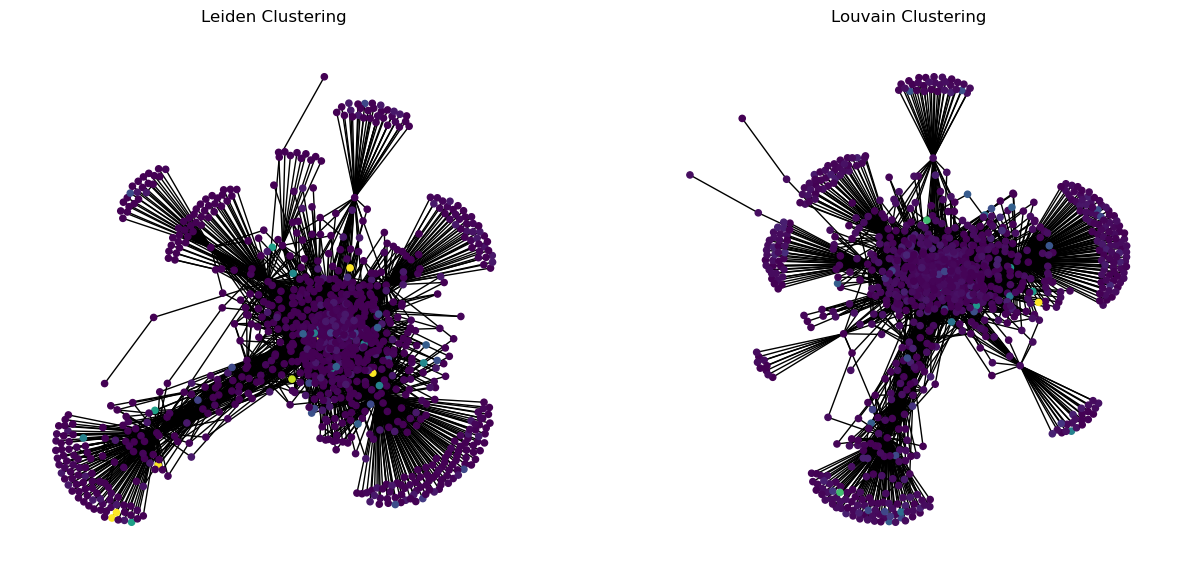

In [17]:
import matplotlib.pyplot as plt
import networkx as nx


sub_nodes = list(G.nodes())[:1000]  # Select the first 1000 nodes
sub_G = G.subgraph(sub_nodes)

color_map_leiden = [df_partition_leiden.loc[node, 'partition'] if node in df_partition_leiden.index else 0 for node in sub_G.nodes()]
color_map_louvain = [df_partition_louvain.loc[node, 'partition'] if node in df_partition_louvain.index else 0 for node in sub_G.nodes()]

plt.figure(figsize=(15, 7))

# Leiden
plt.subplot(1, 2, 1)
nx.draw(sub_G, node_color=color_map_leiden, with_labels=False, node_size=20)
plt.title("Leiden Clustering")

# Louvain
plt.subplot(1, 2, 2)
nx.draw(sub_G, node_color=color_map_louvain, with_labels=False, node_size=20)
plt.title("Louvain Clustering")

plt.show()



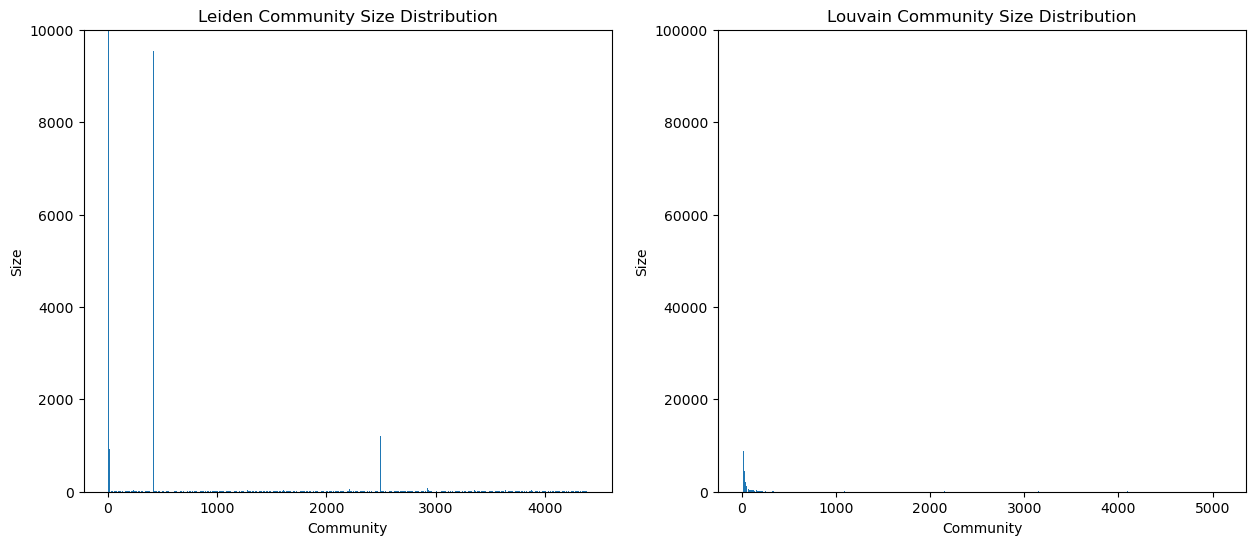

In [28]:
import matplotlib.pyplot as plt

community_sizes_leiden = df_partition_leiden['partition'].value_counts()
leiden_communities = community_sizes_leiden.index.to_pandas().values
leiden_sizes = community_sizes_leiden.to_pandas().values

community_sizes_louvain = df_partition_louvain['partition'].value_counts()
louvain_communities = community_sizes_louvain.index.to_pandas().values
louvain_sizes = community_sizes_louvain.to_pandas().values

plt.figure(figsize=(15, 6))

# Leiden Community Size Distribution
plt.subplot(1, 2, 1)
plt.bar(leiden_communities, leiden_sizes)
plt.title("Leiden Community Size Distribution")
plt.xlabel("Community")
plt.ylabel("Size")
plt.ylim([0, 10000])
# Louvain 
plt.subplot(1, 2, 2)
plt.bar(louvain_communities, louvain_sizes)
plt.title("Louvain Community Size Distribution")
plt.xlabel("Community")
plt.ylabel("Size")
plt.ylim([0, 100000])
plt.show()



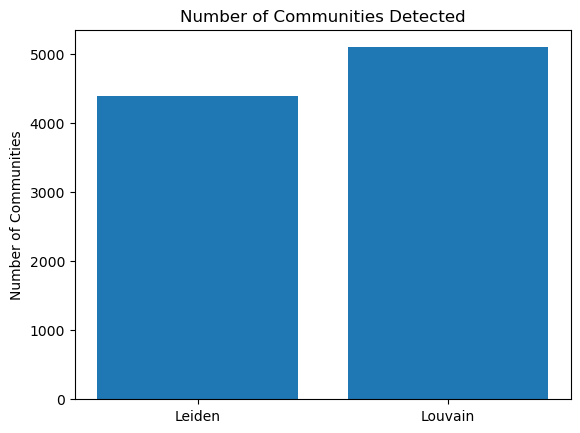

In [30]:
import matplotlib.pyplot as plt

num_communities_leiden = len(community_sizes_leiden)
num_communities_louvain = len(community_sizes_louvain)

plt.bar(['Leiden', 'Louvain'], [num_communities_leiden, num_communities_louvain])
plt.title('Number of Communities Detected')
plt.ylabel('Number of Communities')
plt.show()



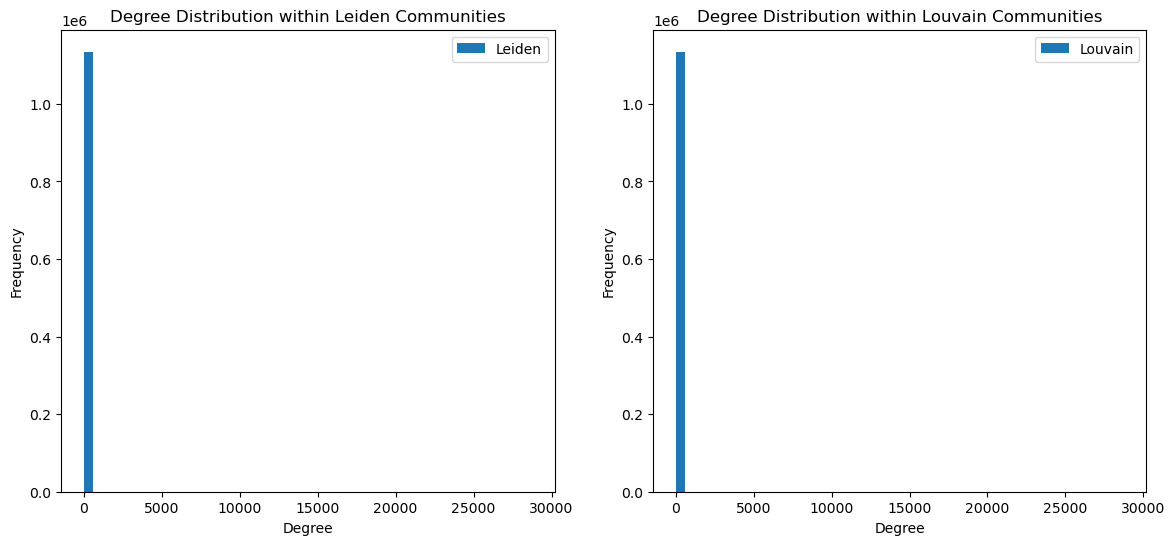

In [40]:
import matplotlib.pyplot as plt


leiden_degrees = G.degree(df_partition_leiden.index)
louvain_degrees = G.degree(df_partition_louvain.index)


fig = plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist([degree for node, degree in leiden_degrees], bins=50, label='Leiden')
plt.title('Degree Distribution within Leiden Communities')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist([degree for node, degree in louvain_degrees], bins=50, label='Louvain')
plt.title('Degree Distribution within Louvain Communities')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

plt.show()




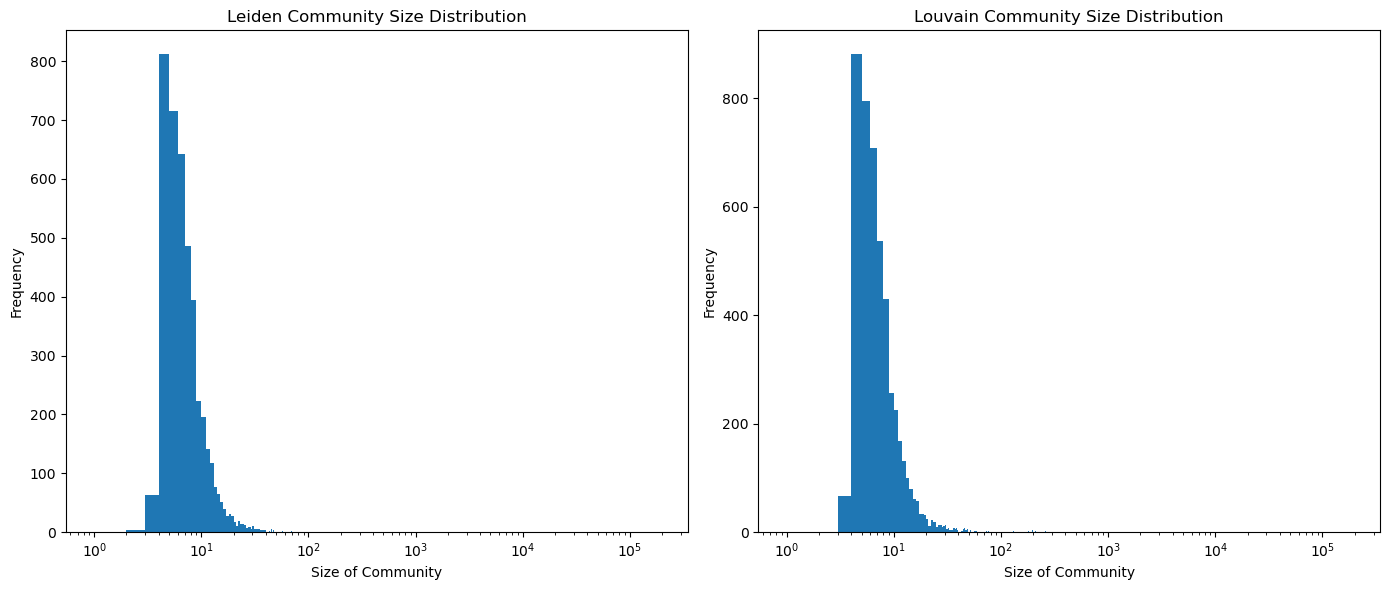

In [41]:
import numpy as np
import matplotlib.pyplot as plt

leiden_values_np = community_sizes_leiden.values.get()  
louvain_values_np = community_sizes_louvain.values.get()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(leiden_values_np, bins=np.arange(1, leiden_values_np.max() + 1, 1))
plt.title('Leiden Community Size Distribution')
plt.xlabel('Size of Community')
plt.ylabel('Frequency')
plt.xscale('log')

plt.subplot(1, 2, 2)
plt.hist(louvain_values_np, bins=np.arange(1, louvain_values_np.max() + 1, 1))
plt.title('Louvain Community Size Distribution')
plt.xlabel('Size of Community')
plt.ylabel('Frequency')
plt.xscale('log')

plt.tight_layout()
plt.show()


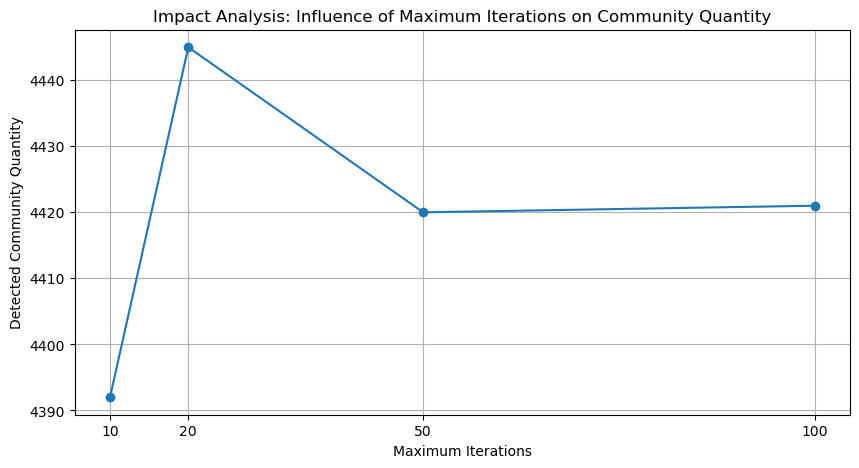

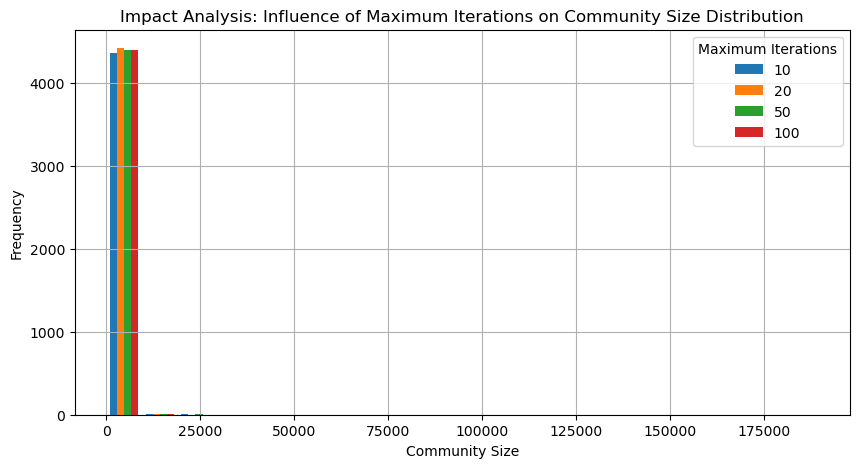

In [65]:
import matplotlib.pyplot as plt
import cugraph

# Try different maximum iteration values
max_iter_values = [10, 20, 50, 100]
num_communities = []
community_sizes = []

# Create a dictionary to store community size distributions for different parameter values
community_size_distribution = {max_iter: [] for max_iter in max_iter_values}

# Create a dictionary to store community internal density for different parameter values
internal_density = {max_iter: [] for max_iter in max_iter_values}



for max_iter in max_iter_values:
    # Perform community detection using the Leiden algorithm
    partition_leiden = cugraph.leiden(cuG, max_iter=max_iter)
    
    # Extract community information
    df_partition_leiden = partition_leiden[0]
    
    # Calculate the number of communities
    num_communities.append(df_partition_leiden['partition'].nunique())
    
    # Calculate the size of each community and store it in community_size_distribution
    community_sizes = df_partition_leiden.groupby('partition').size().to_arrow().to_pylist()
    community_size_distribution[max_iter] = community_sizes
    
    # Calculate community internal density and store it in internal_density
    # Here, you should have a function calculate_internal_density() to compute it


# Visualize the impact of maximum iterations on community quantity
plt.figure(figsize=(10, 5))
plt.plot(max_iter_values, num_communities, marker='o')
plt.title('Impact Analysis: Influence of Maximum Iterations on Community Quantity')
plt.xlabel('Maximum Iterations')
plt.ylabel('Detected Community Quantity')
plt.xticks(max_iter_values)
plt.grid(True)
plt.show()

# Visualize the community size distribution
plt.figure(figsize=(10, 5))
plt.hist(community_size_distribution.values(), bins=20, label=max_iter_values)
plt.title('Impact Analysis: Influence of Maximum Iterations on Community Size Distribution')
plt.xlabel('Community Size')
plt.ylabel('Frequency')
plt.legend(title='Maximum Iterations')
plt.grid(True)
plt.show()




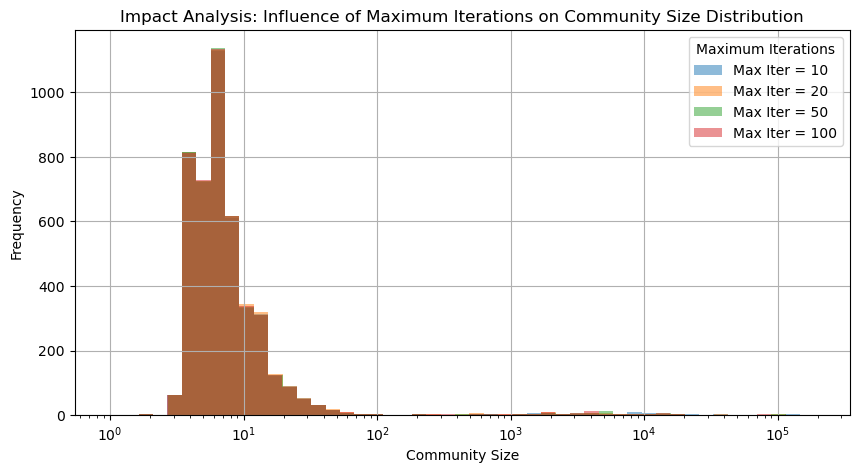

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))


for max_iter, sizes in community_size_distribution.items():
    plt.hist(sizes, bins=np.logspace(np.log10(1), np.log10(max(sizes)), 50), 
             alpha=0.5, label=f'Max Iter = {max_iter}')

plt.title('Impact Analysis: Influence of Maximum Iterations on Community Size Distribution')
plt.xlabel('Community Size')
plt.ylabel('Frequency')
plt.xscale('log')  
plt.legend(title='Maximum Iterations')
plt.grid(True)
plt.show()


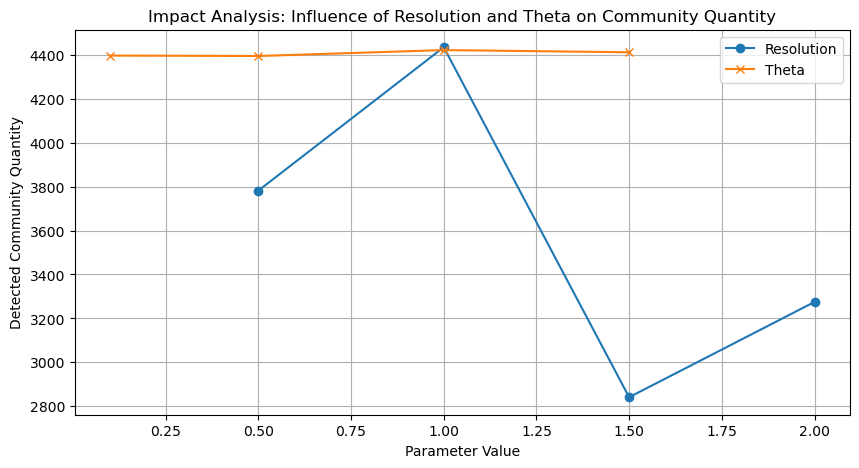

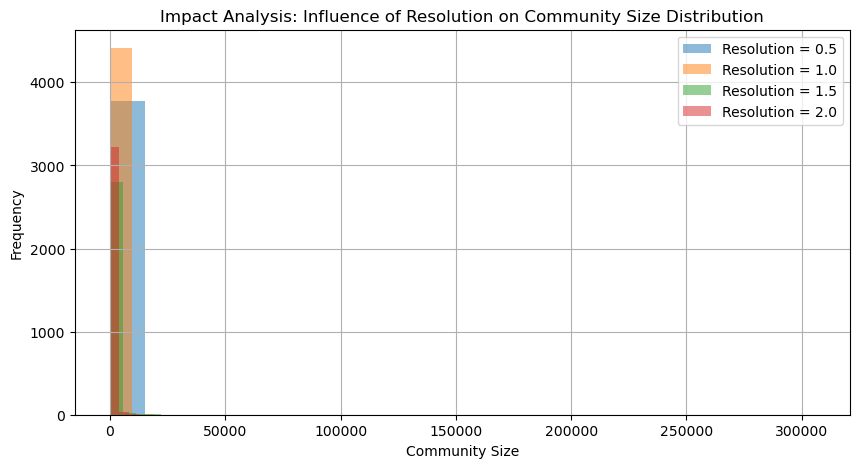

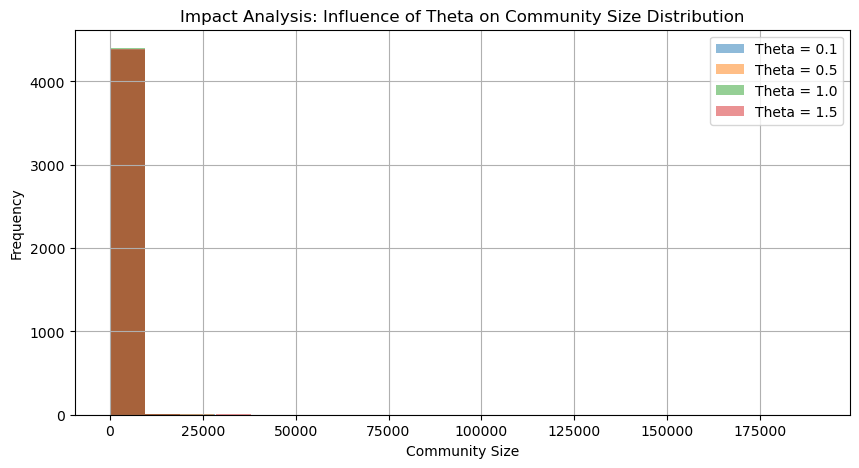

In [70]:
import matplotlib.pyplot as plt
import cugraph


resolution_values = [0.5, 1.0, 1.5, 2.0]
theta_values = [0.1, 0.5, 1.0, 1.5]
num_communities_resolution = []
num_communities_theta = []
community_size_distribution_resolution = {}
community_size_distribution_theta = {}

for resolution in resolution_values:
    partition_leiden = cugraph.leiden(cuG, resolution=resolution)
    df_partition_leiden = partition_leiden[0]
    num_communities_resolution.append(df_partition_leiden['partition'].nunique())
    community_sizes = df_partition_leiden.groupby('partition').size().to_arrow().to_pylist()
    community_size_distribution_resolution[resolution] = community_sizes

for theta in theta_values:
    partition_leiden = cugraph.leiden(cuG, theta=theta)
    df_partition_leiden = partition_leiden[0]
    num_communities_theta.append(df_partition_leiden['partition'].nunique())
    community_sizes = df_partition_leiden.groupby('partition').size().to_arrow().to_pylist()
    community_size_distribution_theta[theta] = community_sizes

plt.figure(figsize=(10, 5))
plt.plot(resolution_values, num_communities_resolution, marker='o', label='Resolution')
plt.plot(theta_values, num_communities_theta, marker='x', label='Theta')
plt.title('Impact Analysis: Influence of Resolution and Theta on Community Quantity')
plt.xlabel('Parameter Value')
plt.ylabel('Detected Community Quantity')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
for resolution, sizes in community_size_distribution_resolution.items():
    plt.hist(sizes, bins=20, alpha=0.5, label=f'Resolution = {resolution}')
plt.title('Impact Analysis: Influence of Resolution on Community Size Distribution')
plt.xlabel('Community Size')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
for theta, sizes in community_size_distribution_theta.items():
    plt.hist(sizes, bins=20, alpha=0.5, label=f'Theta = {theta}')
plt.title('Impact Analysis: Influence of Theta on Community Size Distribution')
plt.xlabel('Community Size')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
